In [1]:
# standard imports
import numpy as np
import pandas as pd

# statistics imports
from scipy import stats

# plotting imports 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# show plots in IPython notebook
%matplotlib inline

C:\Users\szahn\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


We going to start by building a kernal density estimation (KDE) plot manually. To learn more about kernal density estimation, you can visit the [KDE Wikipedia page](https://en.wikipedia.org/wiki/Kernel_density_estimation).

In [3]:
# create a normally-distributed random data set
dataset = np.random.randn(25)

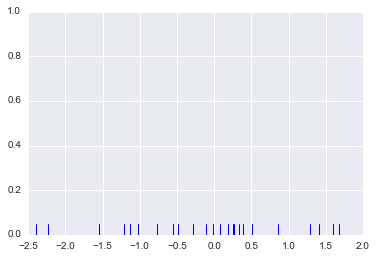

In [4]:
# rug plot
sns.rugplot(dataset, color = )

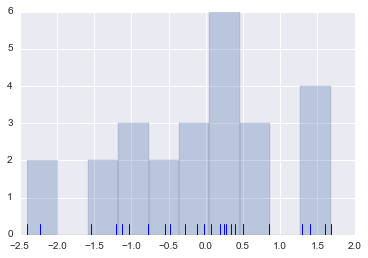

In [6]:
# plot a histogram on top of the rug plot
plt.hist(dataset, alpha = 0.3)
sns.rugplot(dataset)

In using kernal density estimation, we can use a formula to estimate the bandwidth (a free parameter that exhibits a strong influence on the resulting estimation):

$$ h = \left(\frac{4\hat{\sigma}^5}{3n}\right)^\frac{1}{5} \approx 1.06\hat{\sigma}n^{-1/5} $$

where $h$ is the bandwidth, $\hat{\sigma}$ is the standard deviation, and $n$ is the sample size. You can find this information on the KDE wikipedia page. 

(0, 1)

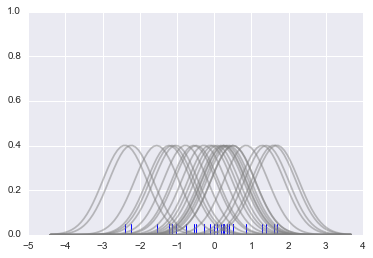

In [10]:
# create a rugplot with the KDE bandwidth
sns.rugplot(dataset)

# set x min and max values
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# create an equally spaced line of 100 points between the min and max
x_axis = np.linspace(x_min, x_max, 100)

# bandwidth
bandwidth = ((4 * dataset.std()**5) / (3 * len(dataset))) ** (1/5)

# list of kernals
kernal_list = []
for dataPt in dataset:
    # create a kernal for each point and append it to the kernal list
    kernal = stats.norm(dataPt, bandwidth).pdf(x_axis)
    kernal_list.append(kernal)
    
    # scale for plotting
    kernal = kernal / kernal.max()
    kernal = kernal * 0.4
    
    #plot the kernal
    plt.plot(x_axis, kernal, color = 'gray', alpha = 0.5)

plt.ylim(0, 1)

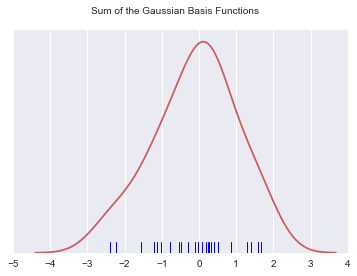

In [11]:
# generate the KDE plot by summing the basis functions
sum_of_kde = np.sum(kernal_list, axis = 0)

# generate the plot
fig = plt.plot(x_axis, sum_of_kde, color = 'indianred')

# add a rugplot too
sns.rugplot(dataset)

# set plot options
plt.yticks([])
plt.suptitle('Sum of the Gaussian Basis Functions')

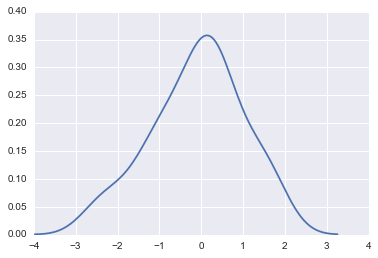

In [12]:
# we can do this much more easily using seaborn
sns.kdeplot(dataset)

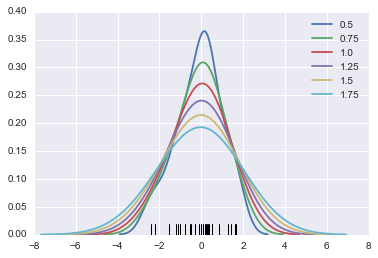

In [14]:
# we can manually adjust the bandwidth for seaborn 
sns.rugplot(dataset, color = 'black')

# plot different bandwidths
for band_width in np.arange(0.5, 2, 0.25):
    sns.kdeplot(dataset, bw = band_width, lw = 1.8, label = band_width)

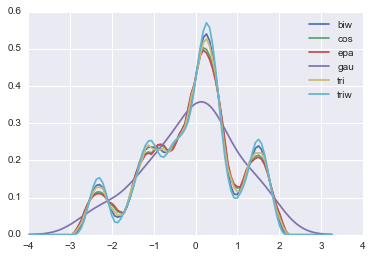

In [16]:
# We can also choose different kernels
kernel_options = ["biw", "cos", "epa", "gau", "tri", "triw"]

# More info on types of kernals
url = 'http://en.wikipedia.org/wiki/Kernel_(statistics)'

# Use label to set legend
for kern in kernel_options:
    sns.kdeplot(dataset, kernel = kern, label = kern)
# you can add shade = True to add shading
# use vertical = True to plot on the vertical axis

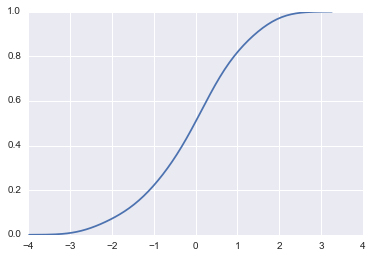

In [18]:
# we can also plot the cumulative density function for the KDE plot
sns.kdeplot(dataset, cumulative = True)

The KDE plots that we've used so far have all be univarate. We can also use KDE plots for multivarate distributions. 

In [20]:
# create a new dataset
mean = [0, 0]
cov = [[1, 0], [0, 100]]
dataset2 = np.random.multivariate_normal(mean = mean, cov = cov, size = 1000)

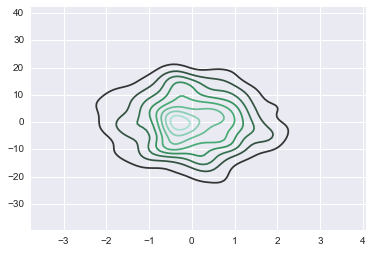

In [21]:
# create a DataFrame and plot it
df1 = pd.DataFrame(dataset2, columns = ['X', 'Y'])
sns.kdeplot(df1)

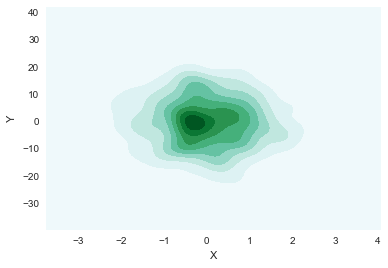

In [23]:
# we can also pass the DataFrame columns separately
# we'll also shade the plot
sns.kdeplot(df1.X, df1.Y, shade = True)

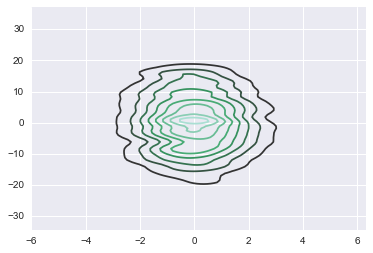

In [24]:
# we can also specify bandwidths in the multivariate plots
# set a ridiculous bandwidth
sns.kdeplot(df1, bw = 1)

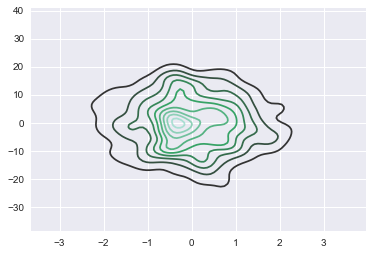

In [25]:
# specify the silverman estimation bandwidth that we calculated earlier
sns.kdeplot(df1, bw = 'silverman')

C:\Users\szahn\Anaconda3\lib\site-packages\matplotlib\__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


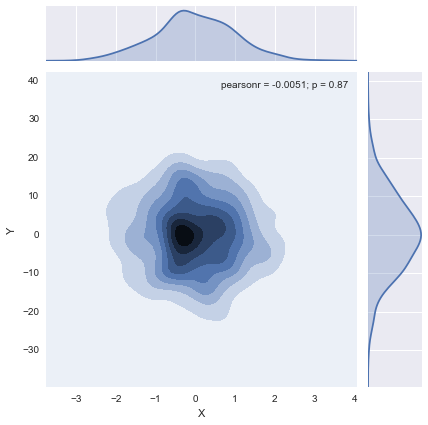

In [26]:
# create a KDE joint plot
sns.jointplot('X', 'Y', df1, kind = 'kde')